In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_5secondWindow.csv')
df.head()

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,0,16170,78.0,NaN,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
1,1,15871,145.0,NaN,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,U12
2,2,16811,150.0,NaN,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
3,3,15831,105.0,NaN,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,U12
4,4,876,77.0,NaN,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,U1


In [3]:
# ordinal encoding

from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

ct = asarray(df['target'])
df['target'] = oe.fit_transform(ct.reshape(-1,1))
dt = asarray(df['user'])
df['user'] = oe.fit_transform(dt.reshape(-1,1))

In [4]:
# sorting by users
df = df.sort_values(by=['user'])
df = df.sort_values(by=['target'])


In [5]:
df

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
454,454,205,21.0,NaN,15.0,9.695111,6.034356,12.109711,2.016502,0.980788,...,89.765090,89.765090,89.765090,NaN,6.750000,6.750000,6.750000,NaN,0.0,0.0
3495,3495,21134,16.0,NaN,46.0,9.920040,8.565419,11.995890,0.489439,NaN,...,72.990591,72.990591,72.990591,5.538316,0.000000,0.000000,0.000000,NaN,0.0,9.0
4455,4455,345,37.0,NaN,100.0,9.688428,9.299836,10.078857,0.269372,0.983014,...,89.808441,89.808441,89.808441,0.010171,4.750000,4.750000,4.750000,NaN,0.0,0.0
4447,4447,504,36.0,NaN,100.0,9.467075,7.379600,12.115954,1.340743,0.931901,...,89.738806,89.738806,89.738806,0.034499,NaN,NaN,NaN,NaN,0.0,0.0
4439,4439,598,130.0,NaN,100.0,9.582564,9.505531,9.649511,0.044042,0.955377,...,86.044453,86.044453,86.044453,0.186593,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,304,19697,38.0,NaN,80.0,12.061651,3.610607,19.117971,5.344576,0.962880,...,78.515521,78.515521,78.515521,NaN,1.292478,1.292478,1.292478,NaN,4.0,6.0
5165,5165,20252,13.0,NaN,100.0,11.287936,3.419956,16.253878,3.876765,0.920464,...,73.702289,73.702289,73.702289,NaN,1.250000,1.250000,1.250000,NaN,4.0,6.0
525,525,7700,156.0,NaN,100.0,8.043208,5.378811,11.448600,2.258053,0.928806,...,89.708466,89.708466,89.708466,0.008192,1.000000,1.000000,1.000000,NaN,4.0,0.0
428,428,8011,309.0,NaN,100.0,9.904143,8.680289,10.738926,0.582044,0.923047,...,89.817702,89.817702,89.817702,0.036535,0.750000,0.750000,0.750000,NaN,4.0,0.0


<AxesSubplot:>

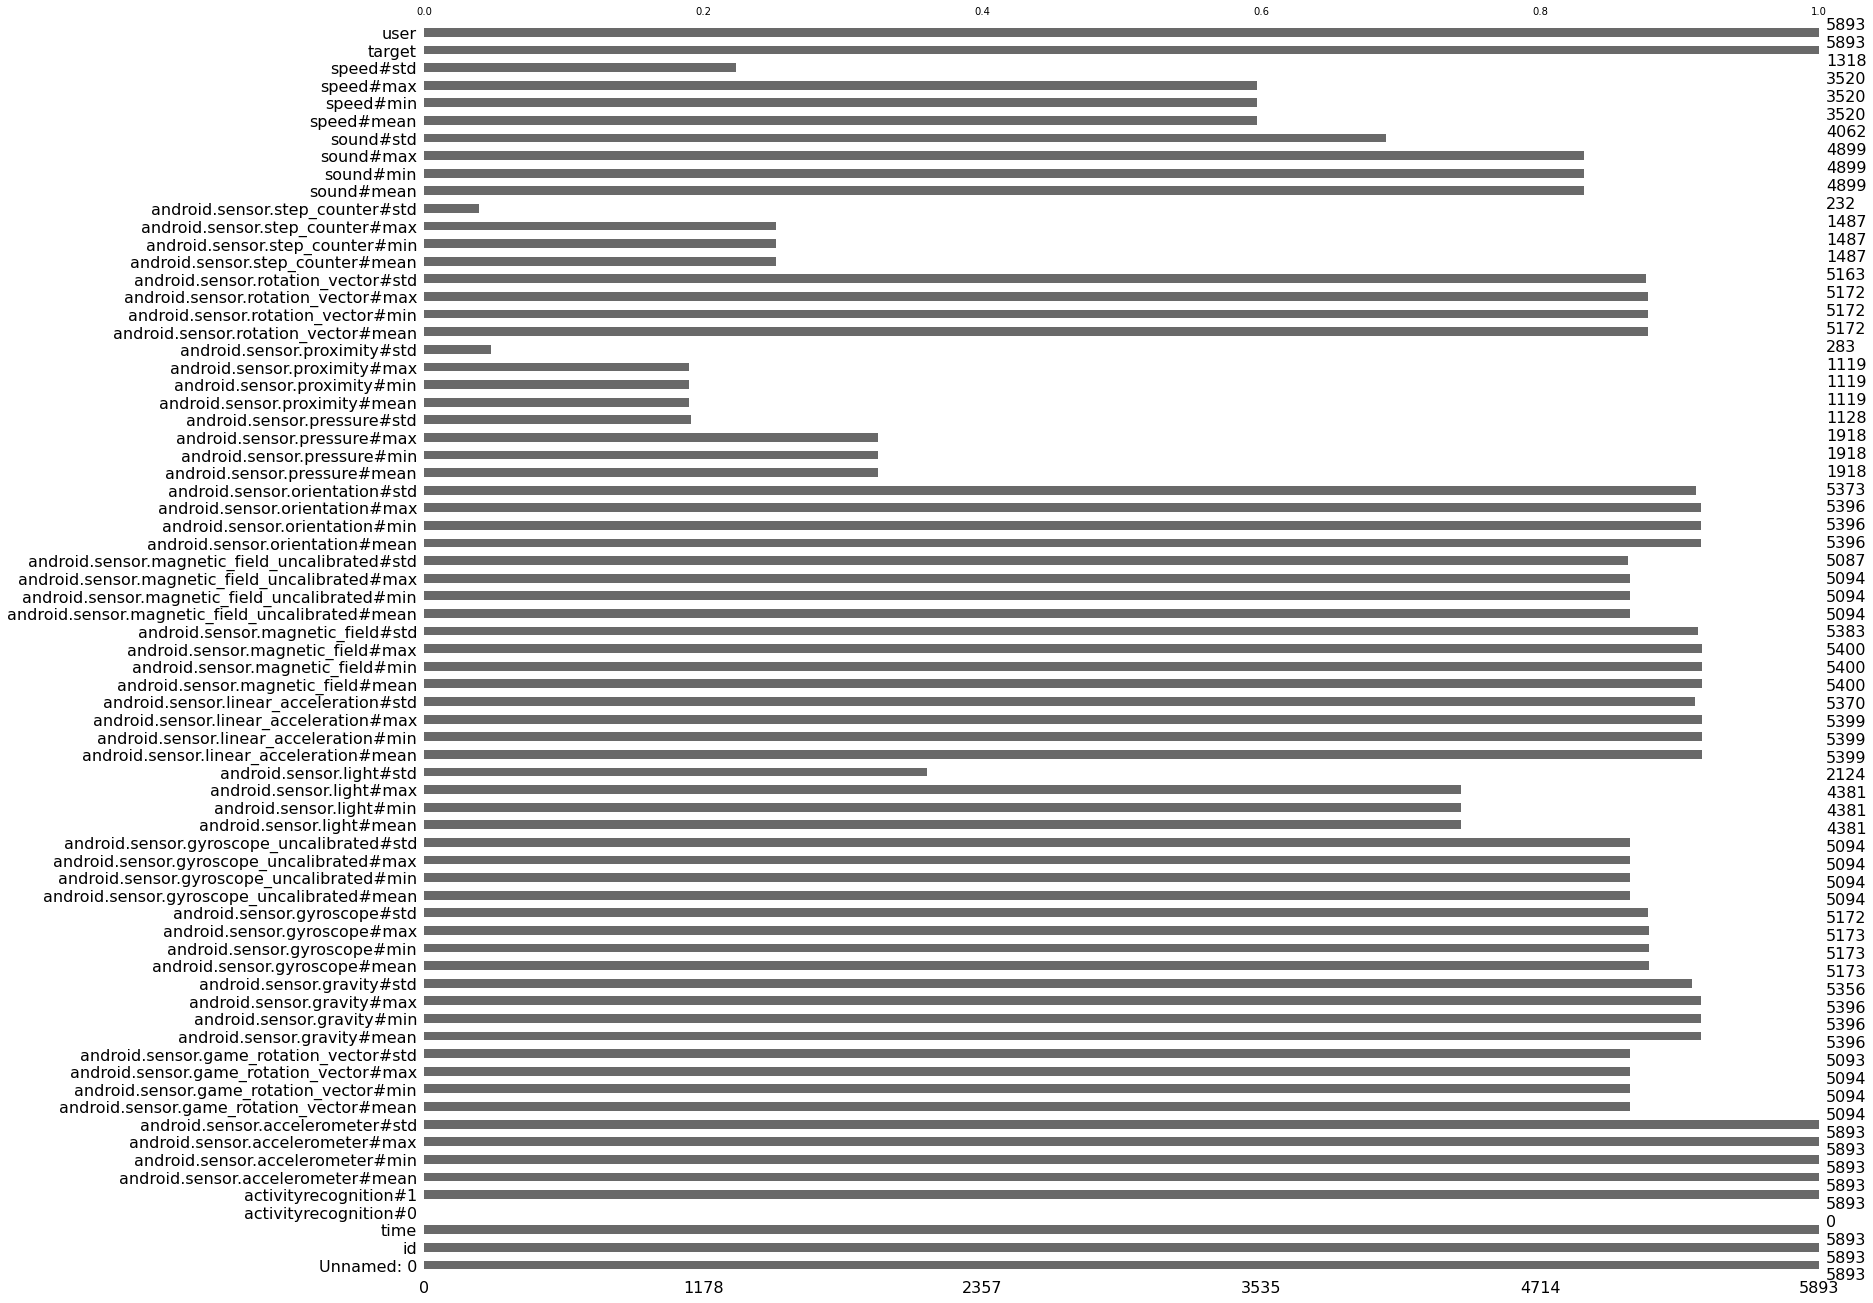

In [6]:
import missingno as msno

msno.bar(df)

In [7]:
a = df

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

activityrecognition#0 100.0 % missing 
android.sensor.game_rotation_vector#mean 13.5585 % missing 
android.sensor.game_rotation_vector#min 13.5585 % missing 
android.sensor.game_rotation_vector#max 13.5585 % missing 
android.sensor.game_rotation_vector#std 13.5754 % missing 
android.sensor.gravity#mean 8.4337 % missing 
android.sensor.gravity#min 8.4337 % missing 
android.sensor.gravity#max 8.4337 % missing 
android.sensor.gravity#std 9.1125 % missing 
android.sensor.gyroscope#mean 12.2179 % missing 
android.sensor.gyroscope#min 12.2179 % missing 
android.sensor.gyroscope#max 12.2179 % missing 
android.sensor.gyroscope#std 12.2349 % missing 
android.sensor.gyroscope_uncalibrated#mean 13.5585 % missing 
android.sensor.gyroscope_uncalibrated#min 13.5585 % missing 
android.sensor.gyroscope_uncalibrated#max 13.5585 % missing 
android.sensor.gyroscope_uncalibrated#std 13.5585 % missing 
android.sensor.light#mean 25.6576 % missing 
android.sensor.light#min 25.6576 % missing 
android.sensor.l

In [8]:
col = [
'activityrecognition#0', 
'user',
'Unnamed: 0',
'id',
'sound#std',
'speed#std',
'speed#mean', 
'speed#min', 
'speed#max', 
'android.sensor.step_counter#mean', 
'android.sensor.step_counter#min',  
'android.sensor.step_counter#max',  
'android.sensor.step_counter#std',
'android.sensor.pressure#mean',  
'android.sensor.pressure#min',  
'android.sensor.pressure#max',  
'android.sensor.pressure#std',  
'android.sensor.proximity#mean',  
'android.sensor.proximity#min',  
'android.sensor.proximity#max',  
'android.sensor.proximity#std',
'android.sensor.light#std'
 ]

In [9]:
df = df.drop(col, axis=1)

<AxesSubplot:>

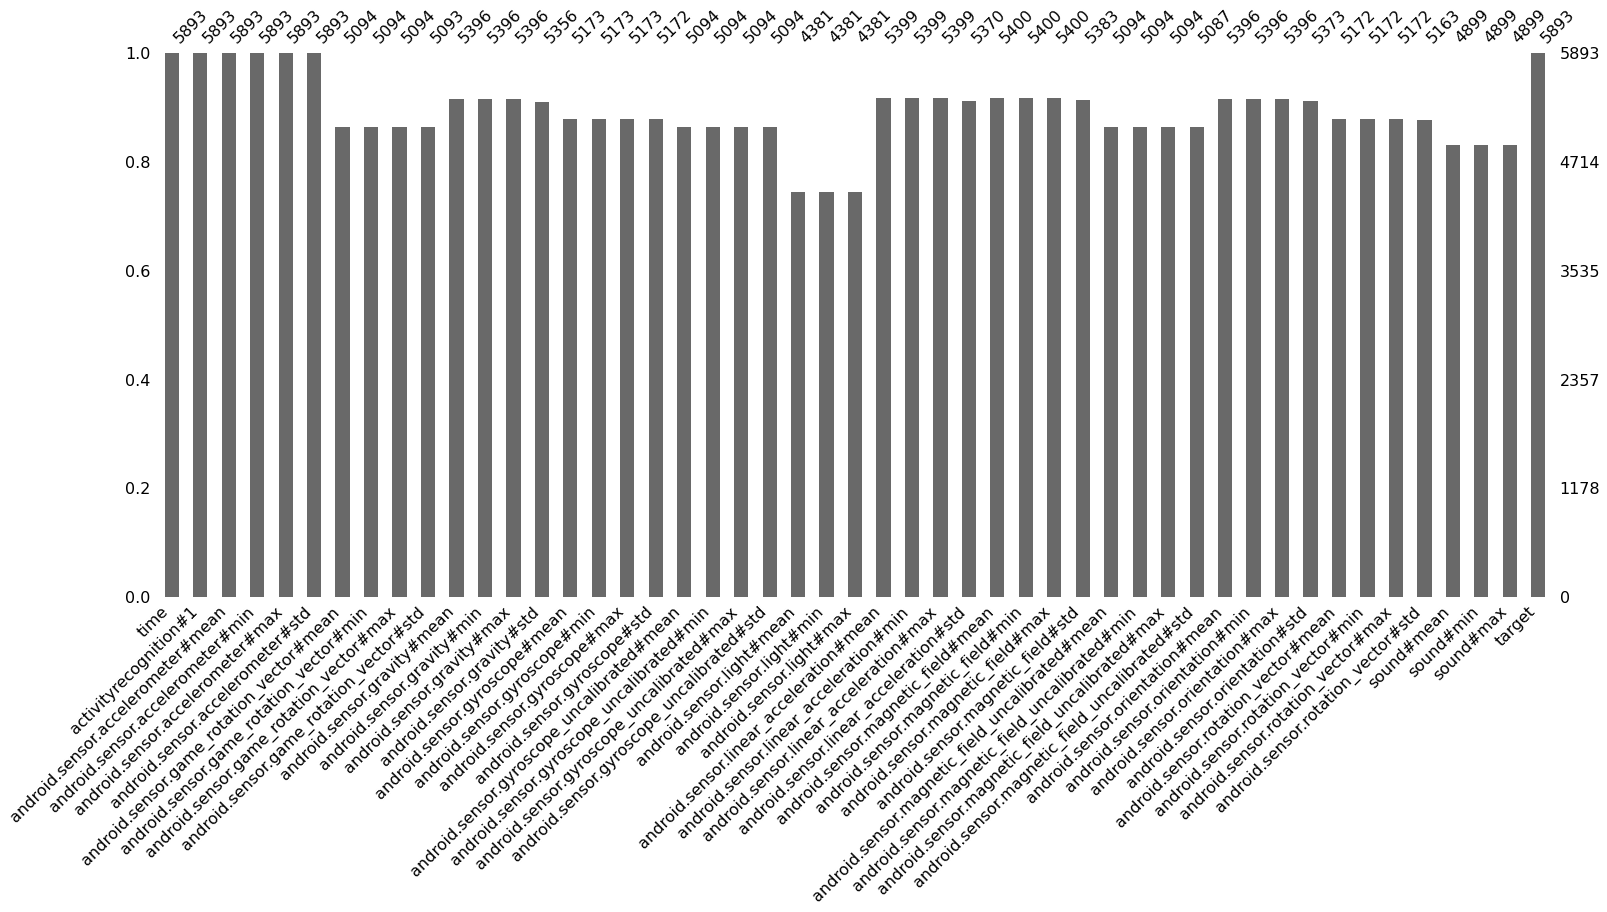

In [10]:
msno.bar(df)

In [11]:
b = df

features_nan=[features for features in b.columns if a[features].isnull().sum()>1 and b[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(b[feature].isnull().mean()*100,4),'% missing ')

android.sensor.game_rotation_vector#mean 13.5585 % missing 
android.sensor.game_rotation_vector#min 13.5585 % missing 
android.sensor.game_rotation_vector#max 13.5585 % missing 
android.sensor.game_rotation_vector#std 13.5754 % missing 
android.sensor.gravity#mean 8.4337 % missing 
android.sensor.gravity#min 8.4337 % missing 
android.sensor.gravity#max 8.4337 % missing 
android.sensor.gravity#std 9.1125 % missing 
android.sensor.gyroscope#mean 12.2179 % missing 
android.sensor.gyroscope#min 12.2179 % missing 
android.sensor.gyroscope#max 12.2179 % missing 
android.sensor.gyroscope#std 12.2349 % missing 
android.sensor.gyroscope_uncalibrated#mean 13.5585 % missing 
android.sensor.gyroscope_uncalibrated#min 13.5585 % missing 
android.sensor.gyroscope_uncalibrated#max 13.5585 % missing 
android.sensor.gyroscope_uncalibrated#std 13.5585 % missing 
android.sensor.light#mean 25.6576 % missing 
android.sensor.light#min 25.6576 % missing 
android.sensor.light#max 25.6576 % missing 
android.sen

In [12]:
b

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.orientation#max,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#min,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,target
454,21.0,15.0,9.695111,6.034356,12.109711,2.016502,0.980788,0.979969,0.981287,0.000523,...,75.383075,0.582861,0.580247,0.571948,0.589573,0.005549,89.765090,89.765090,89.765090,0.0
3495,16.0,46.0,9.920040,8.565419,11.995890,0.489439,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.990591,72.990591,72.990591,0.0
4455,37.0,100.0,9.688428,9.299836,10.078857,0.269372,0.983014,0.981665,0.985135,0.001144,...,127.715070,0.229223,0.762172,0.758542,0.765143,0.001787,89.808441,89.808441,89.808441,0.0
4447,36.0,100.0,9.467075,7.379600,12.115954,1.340743,0.931901,0.922135,0.945505,0.008982,...,273.367700,23.577033,0.722259,0.710210,0.728954,0.006334,89.738806,89.738806,89.738806,0.0
4439,130.0,100.0,9.582564,9.505531,9.649511,0.044042,0.955377,0.943881,0.964352,0.006147,...,209.149031,12.312305,0.921594,0.899327,0.931833,0.015162,86.044453,86.044453,86.044453,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,38.0,80.0,12.061651,3.610607,19.117971,5.344576,0.962880,0.960986,0.964773,0.002678,...,154.986594,21.251391,0.650959,0.634292,0.668730,0.014303,78.515521,78.515521,78.515521,4.0
5165,13.0,100.0,11.287936,3.419956,16.253878,3.876765,0.920464,0.915408,0.933209,0.006907,...,357.420592,119.283677,0.796241,0.771397,0.828594,0.024918,73.702289,73.702289,73.702289,4.0
525,156.0,100.0,8.043208,5.378811,11.448600,2.258053,0.928806,0.888870,0.952157,0.024897,...,239.684535,19.588046,0.943693,0.933562,0.955760,0.007570,89.708466,89.708466,89.708466,4.0
428,309.0,100.0,9.904143,8.680289,10.738926,0.582044,0.923047,0.759127,0.999829,0.099237,...,379.058420,8.754890,0.931251,0.871220,0.999533,0.039433,89.817702,89.817702,89.817702,4.0


In [13]:
df['no.values'] = df.apply(lambda x: x.count(), axis=1)

In [14]:
df.head()

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#min,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,target,no.values
454,21.0,15.0,9.695111,6.034356,12.109711,2.016502,0.980788,0.979969,0.981287,0.000523,...,0.582861,0.580247,0.571948,0.589573,0.005549,89.765090,89.765090,89.765090,0.0,49
3495,16.0,46.0,9.920040,8.565419,11.995890,0.489439,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,72.990591,72.990591,72.990591,0.0,13
4455,37.0,100.0,9.688428,9.299836,10.078857,0.269372,0.983014,0.981665,0.985135,0.001144,...,0.229223,0.762172,0.758542,0.765143,0.001787,89.808441,89.808441,89.808441,0.0,49
4447,36.0,100.0,9.467075,7.379600,12.115954,1.340743,0.931901,0.922135,0.945505,0.008982,...,23.577033,0.722259,0.710210,0.728954,0.006334,89.738806,89.738806,89.738806,0.0,46
4439,130.0,100.0,9.582564,9.505531,9.649511,0.044042,0.955377,0.943881,0.964352,0.006147,...,12.312305,0.921594,0.899327,0.931833,0.015162,86.044453,86.044453,86.044453,0.0,46


In [15]:
df = df.sort_values(by=['no.values'])

In [16]:
df.head(12)

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#min,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,target,no.values
5403,5.0,100.0,9.845444,9.780973,9.952644,0.030795,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7
3369,27.0,100.0,9.832281,9.507575,10.234165,0.158989,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7
5861,19.0,100.0,9.732076,9.308784,10.486836,0.201929,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7
2743,26.0,100.0,9.810162,9.529164,10.228190,0.145190,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7
1292,11.0,100.0,9.697012,8.549579,10.383631,0.369143,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7
4222,14.0,100.0,9.708186,8.466819,11.039146,0.409099,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7
4799,3.0,100.0,9.674599,9.430141,10.006888,0.113178,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7
92,17.0,100.0,9.728209,9.111535,10.154680,0.210600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7
3328,15.0,100.0,9.710964,9.025275,10.588506,0.337615,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7
5676,28.0,100.0,9.829931,9.455864,10.203080,0.154116,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7


In [17]:
df['no.values'].value_counts()

49    2835
46    2096
13     457
29     113
43      93
26      93
37      63
10      25
48      20
45      20
34      16
44      12
7       11
28       7
42       7
25       6
40       6
22       4
41       3
47       2
27       1
24       1
23       1
21       1
Name: no.values, dtype: int64

In [18]:
df.head()

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#min,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,target,no.values
5403,5.0,100.0,9.845444,9.780973,9.952644,0.030795,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,7
3369,27.0,100.0,9.832281,9.507575,10.234165,0.158989,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7
5861,19.0,100.0,9.732076,9.308784,10.486836,0.201929,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7
2743,26.0,100.0,9.810162,9.529164,10.228190,0.145190,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7
1292,11.0,100.0,9.697012,8.549579,10.383631,0.369143,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,7


In [19]:
df.drop(df.index[0:500], inplace=True)

In [20]:
df

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#min,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,target,no.values
1484,10.0,100.0,10.517100,7.222011,17.639868,2.591458,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,69.106035,69.106035,69.106035,4.0,25
962,13.0,100.0,10.017785,9.982179,10.078943,0.017710,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,69.337352,69.337352,69.337352,2.0,25
3968,18.0,100.0,9.559225,6.413208,13.889345,2.806740,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,25
1514,21.0,100.0,10.007405,5.356287,16.355745,3.028559,NaN,NaN,NaN,NaN,...,0.908832,NaN,NaN,NaN,NaN,66.804915,66.804915,66.804915,4.0,25
2692,24.0,100.0,9.951513,5.205961,17.160008,3.095505,NaN,NaN,NaN,NaN,...,24.022990,NaN,NaN,NaN,NaN,66.804915,66.804915,66.804915,4.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,309.0,100.0,9.904143,8.680289,10.738926,0.582044,0.923047,0.759127,0.999829,0.099237,...,8.754890,0.931251,0.871220,0.999533,0.039433,89.817702,89.817702,89.817702,4.0,49
4948,40.0,100.0,9.874971,9.528610,10.332971,0.139560,0.802568,0.800252,0.804186,0.001274,...,0.175471,0.415323,0.415323,0.415323,0.002654,30.629578,30.629578,30.629578,2.0,49
3406,192.0,100.0,9.850824,9.812736,9.892934,0.014960,0.335390,0.330446,0.381812,0.014136,...,0.926325,0.990591,0.990061,0.990831,0.000362,49.277398,39.645425,58.909372,2.0,49
507,152.0,100.0,9.933201,9.917427,9.952119,0.012605,0.952790,0.952624,0.952922,0.000112,...,0.064642,0.998502,0.998463,0.998550,0.000029,89.294857,89.294857,89.294857,2.0,49


<AxesSubplot:>

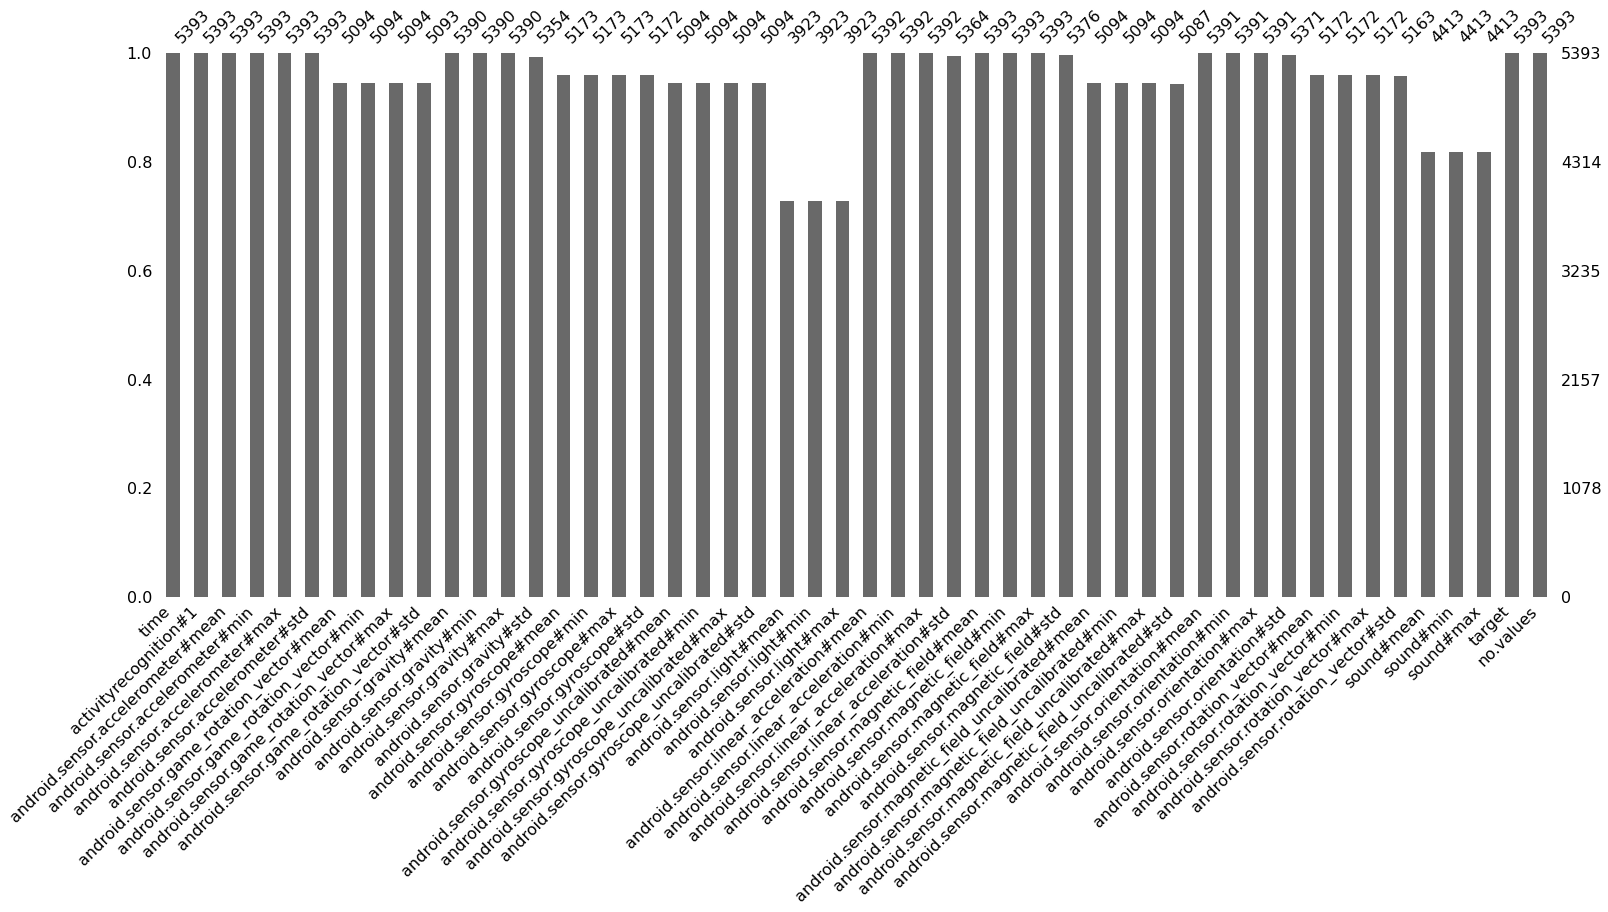

In [21]:
msno.bar(df)